Catastrophe Prediction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import balanced_accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from torch.nn.functional import softmax
import torch
import re
import lightgbm as lgb
from sklearn.decomposition import PCA

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
df_train = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/train.csv'))

In [ ]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
df_train.nunique()

,0
id,7613
keyword,221
location,3341
text,7503
target,2


In [ ]:
for col in df_train.describe(include = 'object').columns:
    print(col)
    print(f"Il y a " +str(len(df_train[col].unique())) + " entités distinctes pour " +str(col) +".")
    print(df_train[col].unique())
    print('-'*50)

keyword
Il y a 222 entités distinctes pour keyword.
[nan 'ablaze' 'accident' 'aftershock' 'airplane%20accident' 'ambulance'
 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army' 'arson'
 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazing' 'bleeding' 'blew%20up' 'blight'
 'blizzard' 'blood' 'bloody' 'blown%20up' 'body%20bag' 'body%20bagging'
 'body%20bags' 'bomb' 'bombed' 'bombing' 'bridge%20collapse'
 'buildings%20burning' 'buildings%20on%20fire' 'burned' 'burning'
 'burning%20buildings' 'bush%20fires' 'casualties' 'casualty'
 'catastrophe' 'catastrophic' 'chemical%20emergency' 'cliff%20fall'
 'collapse' 'collapsed' 'collide' 'collided' 'collision' 'crash' 'crashed'
 'crush' 'crushed' 'curfew' 'cyclone' 'damage' 'danger' 'dead' 'death'
 'deaths' 'debris' 'deluge' 'deluged' 'demolish' 'demolished' 'demolition'
 'derail' 'derailed' 'derailment' 'desolate' 'desolation' 'destroy'
 'destroyed' 'destruction' 'detonate' 'detonation' 'deva

In [ ]:
filtered_df = df_train[df_train['target'] == 1]
filtered_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
for col in filtered_df.describe(include = 'object').columns:
    print(col)
    print(f"Il y a " +str(len(filtered_df[col].unique())) + " entités distinctes pour " +str(col) +".")
    print(filtered_df[col].unique())
    print('-'*50)

keyword
Il y a 221 entités distinctes pour keyword.
[nan 'ablaze' 'accident' 'airplane%20accident' 'ambulance' 'annihilated'
 'annihilation' 'apocalypse' 'armageddon' 'army' 'arson' 'arsonist'
 'attack' 'attacked' 'avalanche' 'battle' 'bioterror' 'bioterrorism'
 'blaze' 'blazing' 'bleeding' 'blew%20up' 'blight' 'blizzard' 'blood'
 'bloody' 'blown%20up' 'body%20bag' 'body%20bagging' 'body%20bags' 'bomb'
 'bombed' 'bombing' 'bridge%20collapse' 'buildings%20burning'
 'buildings%20on%20fire' 'burned' 'burning' 'burning%20buildings'
 'bush%20fires' 'casualties' 'casualty' 'catastrophe' 'catastrophic'
 'chemical%20emergency' 'cliff%20fall' 'collapse' 'collapsed' 'collide'
 'collided' 'collision' 'crash' 'crashed' 'crush' 'crushed' 'curfew'
 'cyclone' 'damage' 'danger' 'dead' 'death' 'deaths' 'debris' 'deluge'
 'deluged' 'demolish' 'demolished' 'demolition' 'derail' 'derailed'
 'derailment' 'desolate' 'desolation' 'destroy' 'destroyed' 'destruction'
 'detonate' 'detonation' 'devastated' 'deva

In [ ]:
filtered_keywords = df_train[df_train['keyword'].notna()]
filtered_keywords.head()

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0


In [ ]:
filtered_keywords.nunique()

,0
id,7552
keyword,221
location,3341
text,7447
target,2


In [ ]:
count_target_1 = (filtered_keywords['target'] == 1).sum()
print(count_target_1)

3229


In [ ]:
count_target_0 = (filtered_keywords['target'] == 0).sum()
print(count_target_0)

4323


In [ ]:
df_test = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/test.csv'))

In [ ]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [ ]:
df_test.nunique()

,0
id,3263
keyword,221
location,1602
text,3243


In [ ]:
for col in df_test.describe(include = 'object').columns:
    print(col)
    print(f"Il y a " +str(len(df_test[col].unique())) + " entités distinctes pour " +str(col) +".")
    print(df_test[col].unique())
    print('-'*50)

keyword
Il y a 222 entités distinctes pour keyword.
[nan 'ablaze' 'accident' 'aftershock' 'airplane%20accident' 'ambulance'
 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army' 'arson'
 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazing' 'bleeding' 'blew%20up' 'blight'
 'blizzard' 'blood' 'bloody' 'blown%20up' 'body%20bag' 'body%20bagging'
 'body%20bags' 'bomb' 'bombed' 'bombing' 'bridge%20collapse'
 'buildings%20burning' 'buildings%20on%20fire' 'burned' 'burning'
 'burning%20buildings' 'bush%20fires' 'casualties' 'casualty'
 'catastrophe' 'catastrophic' 'chemical%20emergency' 'cliff%20fall'
 'collapse' 'collapsed' 'collide' 'collided' 'collision' 'crash' 'crashed'
 'crush' 'crushed' 'curfew' 'cyclone' 'damage' 'danger' 'dead' 'death'
 'deaths' 'debris' 'deluge' 'deluged' 'demolish' 'demolished' 'demolition'
 'derail' 'derailed' 'derailment' 'desolate' 'desolation' 'destroy'
 'destroyed' 'destruction' 'detonate' 'detonation' 'deva

In [ ]:
print(df_train[['keyword', 'text']])

     keyword                                               text
0        NaN  Our Deeds are the Reason of this #earthquake M...
1        NaN             Forest fire near La Ronge Sask. Canada
2        NaN  All residents asked to 'shelter in place' are ...
3        NaN  13,000 people receive #wildfires evacuation or...
4        NaN  Just got sent this photo from Ruby #Alaska as ...
...      ...                                                ...
7608     NaN  Two giant cranes holding a bridge collapse int...
7609     NaN  @aria_ahrary @TheTawniest The out of control w...
7610     NaN  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611     NaN  Police investigating after an e-bike collided ...
7612     NaN  The Latest: More Homes Razed by Northern Calif...

[7613 rows x 2 columns]


<ipython-input-4-27b0f1f20dc4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['keyword'] = X['keyword'].fillna('')
<ipython-input-4-27b0f1f20dc4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['text'] = X['text'].fillna('')
<ipython-input-4-27b0f1f20dc4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

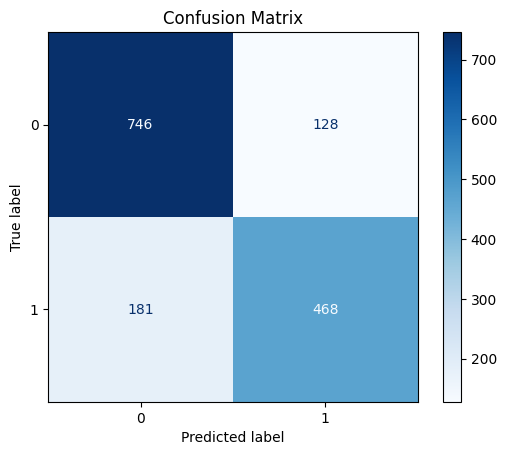

Confusion Matrix:
 [[746 128]
 [181 468]]
Predicted Labels: [0 0 1 ... 1 1 0]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.83       874
           1       0.79      0.72      0.75       649

    accuracy                           0.80      1523
   macro avg       0.79      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523



In [ ]:
X = df_train[['keyword', 'text']]

if 'keyword' in X.columns:
    X['keyword'] = X['keyword'].fillna('')
if 'text' in X.columns:
    X['text'] = X['text'].fillna('')

X['combined'] = X['keyword'] + ' ' + X['text']
X = X['combined']
y = df_train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

y_pred_proba = model.predict_proba(X_test_tfidf)[:, 1]

threshold = 0.5
y_pred_fin = (y_pred_proba >= threshold).astype(int)

cm = confusion_matrix(y_test, y_pred_fin)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

print("Confusion Matrix:\n", cm)
print("Predicted Labels:", y_pred_fin)

report = classification_report(y_test, y_pred_fin)
print("Classification Report:\n", report)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 2622, number of negative: 3468
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057517 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15951
[LightGBM] [Info] Number of data points in the train set: 6090, number of used features: 742
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430542 -> initscore=-0.279641
[LightGBM] [Info] Start training from score -0.279641
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[100]	train's binary_logloss: 0.398417	valid's binary_logloss: 0.493309
Confusion Matrix:


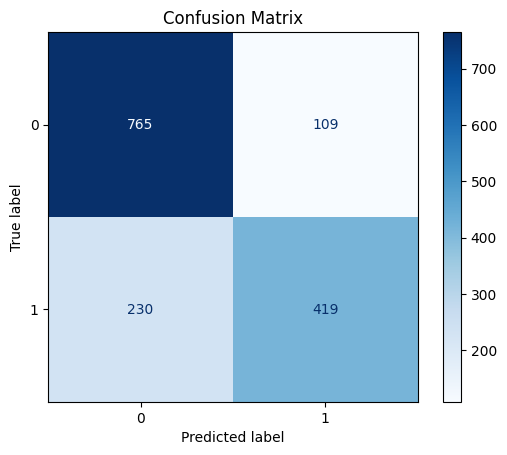


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       874
           1       0.79      0.65      0.71       649

    accuracy                           0.78      1523
   macro avg       0.78      0.76      0.77      1523
weighted avg       0.78      0.78      0.77      1523

Accuracy: 0.7774130006565988
Top 10 Feature Importances:
         Feature   Importance
2978        http  4562.068896
3074          in  1450.220249
9650         you  1248.547685
2905   hiroshima   896.937414
7465     suicide   771.598164
2396       fires   750.928980
4113          my   673.401337
3344      killed   526.820573
1086  california   512.456299
4365         new   487.445821


In [ ]:
X = df_train[['keyword', 'text']].fillna('')
X['combined'] = X['keyword'] + ' ' + X['text']
X = X['combined']
y = df_train['target']

tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'n_estimators': 100,
}


model = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_train, lgb_test],
    valid_names=['train', 'valid'],
    num_boost_round=100,
    callbacks=[lgb.early_stopping(stopping_rounds=50)]
)


y_pred_proba = model.predict(X_test, num_iteration=model.best_iteration)

threshold = 0.5
y_pred = (y_pred_proba >= threshold).astype(int)

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

importances = model.feature_importance(importance_type='gain')
feature_names = tfidf_vectorizer.get_feature_names_out()

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Top 10 Feature Importances:")
print(feature_importance_df.head(10))

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.3 MB/s eta 0:00:00


In [ ]:
df_train = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/train.csv'))

Generating Predictions: 100%|██████████| 1523/1523 [01:58<00:00, 12.86it/s]


Predictions on validation set: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,

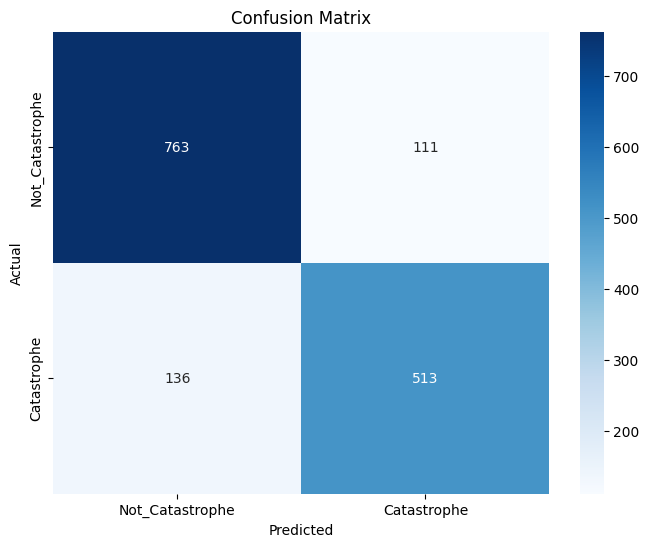

In [ ]:
import pandas as pd
import datasets
from transformers import LongformerTokenizerFast, LongformerForSequenceClassification, Trainer, TrainingArguments, LongformerConfig
import torch
from sklearn.model_selection import train_test_split
from datasets import Dataset, Features, Value, ClassLabel
import numpy as np
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import evaluate
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

config = LongformerConfig()

X = df_train[['keyword', 'text']].fillna('')
X['combined'] = X['keyword'] + ' ' + X['text']
X = X['combined']
y = df_train['target']

max_sequence_length = X.str.len().max()

print("Longueur maximale des séquences :", max_sequence_length)

df_train = pd.DataFrame({'text': X, 'label': y})

train_df, val_df = train_test_split(df_train, test_size=0.2, random_state=42)

train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)

unique_labels = ['Not_Catastrophe', 'Catastrophe']
num_classes = len(unique_labels)
class_label = ClassLabel(num_classes=num_classes, names=unique_labels)

def map_labels(example):
    if isinstance(example['label'], str):
        example['label'] = class_label.str2int(example['label'])
    return example

train_dataset = train_dataset.map(map_labels)
val_dataset = val_dataset.map(map_labels)

train_dataset = train_dataset.remove_columns('__index_level_0__')
val_dataset = val_dataset.remove_columns('__index_level_0__')

features = Features({
    'text': Value(dtype='string'),
    'label': class_label
})

train_dataset = train_dataset.cast(features)
val_dataset = val_dataset.cast(features)

model = LongformerForSequenceClassification.from_pretrained('allenai/longformer-base-4096', num_labels=num_classes, device_map="auto")
tokenizer = LongformerTokenizerFast.from_pretrained('allenai/longformer-base-4096', max_length=500)

def tokenization(batched_text):
    return tokenizer(batched_text['text'], padding='max_length', truncation=True, max_length=500)

train_data = train_dataset.map(tokenization, batched=True)
val_data = val_dataset.map(tokenization, batched=True)

accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)

    f1 = f1_score(labels, predictions, average='weighted')

    acc = accuracy.compute(predictions=predictions, references=labels)['accuracy']
    print(f"Accuracy: {acc:.4f}, F1: {f1:.4f}")

    return {
        'accuracy': acc,
        'f1': f1
    }

training_args = TrainingArguments(
    output_dir="./temp_longformer_results",
    num_train_epochs=1,
    per_device_train_batch_size=10,
    gradient_accumulation_steps=2,
    per_device_eval_batch_size=10,
    save_strategy="epoch",
    disable_tqdm=False,
    load_best_model_at_end=True,
    warmup_steps=200,
    weight_decay=0.01,
    logging_steps=2,
    fp16=True,
    dataloader_num_workers=0,
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    report_to=[],
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=val_data,
    compute_metrics=compute_metrics,
)

trainer.train()

def generate_predictions(dataset):
    model.eval()
    predictions = []
    true_labels = []

    device = next(model.parameters()).device

    for batch in tqdm(dataset, desc="Generating Predictions"):
        with torch.no_grad():
            inputs = tokenizer(batch['text'], padding='max_length', truncation=True, max_length=500, return_tensors='pt').to(device)
            outputs = model(**inputs)
            logits = outputs.logits

            preds = np.argmax(logits.detach().cpu().numpy(), axis=1)
            predictions.extend(preds)

            if isinstance(batch['label'], list):
                true_labels.extend(batch['label'])
            else:
                true_labels.append(batch['label'])

    return predictions, true_labels

val_predictions, val_true_labels = generate_predictions(val_data)

print("Predictions on validation set:", val_predictions)

print("\nClassification Report:")
print(classification_report(val_true_labels, val_predictions, target_names=unique_labels))

cm = confusion_matrix(val_true_labels, val_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()